In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('../build/Release/')
import convex_hull
from matplotlib.collections import LineCollection

from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d, HalfspaceIntersection, ConvexHull

In [2]:
def scatter_color(location):
    color = 'blue'
    if location.location == convex_hull.Location.Inside:
        color = 'green'

    elif location.location == convex_hull.Location.OnEdge:
        color = 'purple'

    elif location.location == convex_hull.Location.Vertex:
        color = 'red'

    return color


In [3]:
def genearte_graph(x, y, hull_points, check_points=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Points')  # Отображение всех точек
    plt.plot(hull_points[:, 0], hull_points[:, 1], 'r-', label='Convex Hull')  # Отображение выпуклой оболочки 

    if check_points is not None:
        for i in check_points:
            plt.scatter(i[0], i[1], color=scatter_color(i[2]), label=i[3])
    plt.title('Convex Hull using Andrew\'s Algorithm')
    plt.xlabel('X')
    plt.ylabel('Y')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.grid(True)
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

In [4]:
# Генерация случайных точек
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
points_np = np.column_stack((x, y)).tolist()
points_np = np.array(points_np)
# Преобразование списка координат в список объектов Pointa
points = [convex_hull.Point(pt[0], pt[1]) for pt in points_np]

In [5]:
hull = convex_hull.andrew_convex_hull(points)

hull_points = [(p.x, p.y) for p in hull]

# Добавление первой точки в конец списка для замыкания контура
hull_points.append(hull_points[0])
hull_points = np.array(hull_points)
hull_points

array([[0.02019995, 0.17649261],
       [0.02747101, 0.14086489],
       [0.05470475, 0.04465081],
       [0.21493084, 0.01904616],
       [0.82884444, 0.01872699],
       [0.93218302, 0.02664969],
       [0.98295914, 0.08858624],
       [0.9977167 , 0.31214385],
       [0.99361632, 0.96344913],
       [0.77184448, 0.97391565],
       [0.2017018 , 0.9794224 ],
       [0.11431476, 0.94307935],
       [0.03638242, 0.32689593],
       [0.02019995, 0.17649261]])

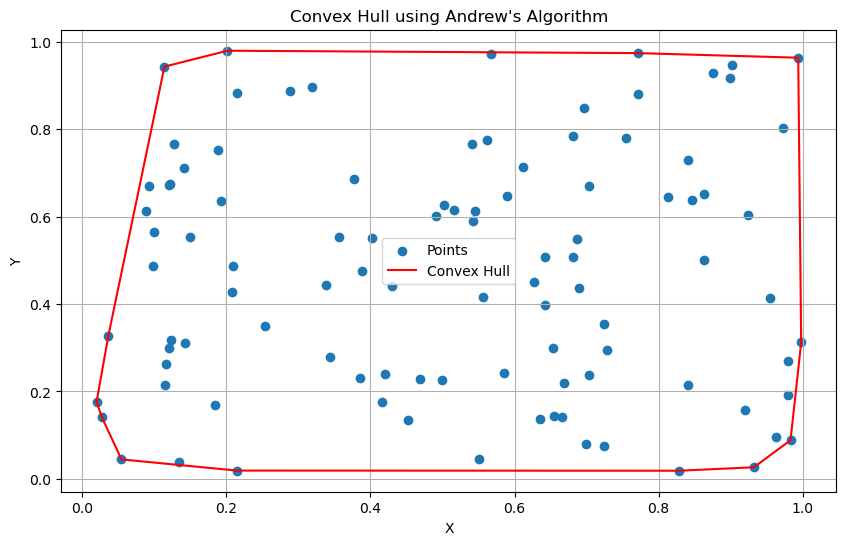

In [6]:
genearte_graph(x, y, hull_points)

In [7]:
def get_point_position(test_point, hull):
    location = convex_hull.point_location(hull, test_point)

    location_str = ""
    if location.location == convex_hull.Location.Inside:
        location_str = "Inside"

    elif location.location == convex_hull.Location.OnEdge:
        location_str = "On the Edge"

    elif location.location == convex_hull.Location.Vertex:
        location_str = f"Vertex (index {location.index})"

    else:
        location_str = "Outside"
        
    return location_str, location

In [8]:
min_x = min(p.x for p in hull)
max_x = max(p.x for p in hull)
min_y = min(p.y for p in hull)
max_y = max(p.y for p in hull)

while True:
    test_point_inside = convex_hull.Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
    location_str_inside, location_inside = get_point_position(test_point_inside, hull)
    if location_inside.location == convex_hull.Location.Inside:
        break

print(f'Point ({test_point_inside.x}, {test_point_inside.y}) is {location_str_inside}')

Point (0.6370355318687886, 0.19782106962256593) is Inside


In [9]:
test_point_verterx = convex_hull.Point(hull_points[0][0], hull_points[0][1])
location_str_verterx, location_verterx = get_point_position(test_point_verterx, hull)

print(f'Point ({test_point_verterx.x}, {test_point_verterx.y}) is {location_str_verterx}')

Point (0.02019994823828497, 0.17649261428085405) is Vertex (index 0)


In [10]:
edge_start = hull[0]
edge_end = hull[1]
test_point_edge = convex_hull.Point((edge_start.x + edge_end.x) / 2, (edge_start.y + edge_end.y) / 2)
location_str_edge, location_edge = get_point_position(test_point_edge, hull)

print(f'Point ({test_point_edge.x}, {test_point_edge.y}) is {location_str_edge}')

Point (0.02383547795081581, 0.15867874973553026) is On the Edge


In [11]:
test_point_outside = convex_hull.Point(0.11526361, 0.97764806)
location_str_outside, location_outside = get_point_position(test_point_outside, hull)

print(f'Point ({test_point_outside.x}, {test_point_outside.y}) is {location_str_outside}')

Point (0.11526361, 0.97764806) is Outside


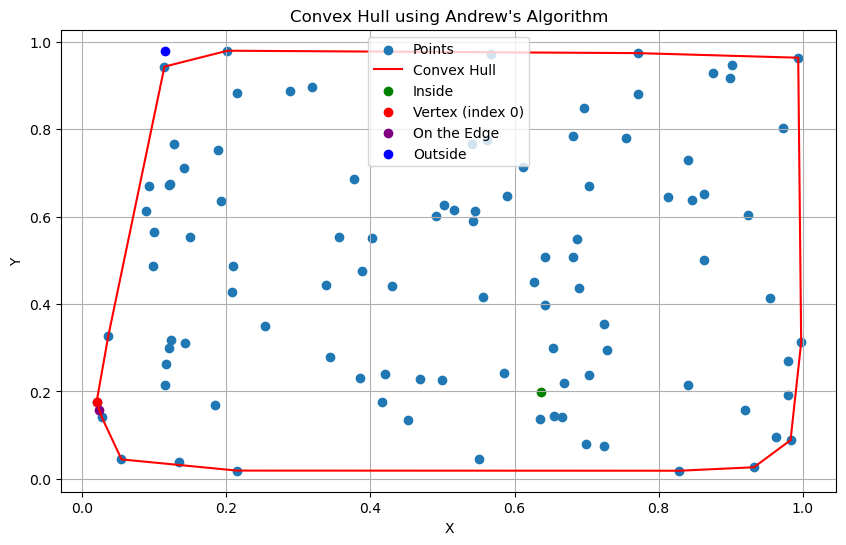

In [12]:
test_points = [
        [[test_point_inside.x], [test_point_inside.y], location_inside, location_str_inside],
        [[test_point_verterx.x], [test_point_verterx.y], location_verterx, location_str_verterx],
        [[test_point_edge.x], [test_point_edge.y], location_edge, location_str_edge],
        [[test_point_outside.x], [test_point_outside.y], location_outside, location_str_outside]
    ]
genearte_graph(x, y, hull_points, test_points)

In [13]:
!pytest -v test.py

============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\hp\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Project\algos\m_algos_3\python
plugins: anyio-4.2.0
collecting ... collected 13 items

test.py::test_inside[test_point0] PASSED                                 [  7%]
test.py::test_inside[test_point1] PASSED                                 [ 15%]
test.py::test_inside[test_point2] PASSED                                 [ 23%]
test.py::test_outside[test_point0] PASSED                                [ 30%]
test.py::test_outside[test_point1] PASSED                                [ 38%]
test.py::test_outside[test_point2] PASSED                                [ 46%]
test.py::test_vertex[test_point0] PASSED                                 [ 53%]
test.py::test_vertex[test_point1] PASSED                                 [ 61%]
test.py::test_vertex[test_point2] PASSED                     

In [14]:
def check_points(test_point, hull):
    result = []
    for i in test_point:
        point = convex_hull.Point(i[0], i[1])   
        location_str, location = get_point_position(point, hull)
        result.append([[point.x], [point.y], location, location_str])
    return result


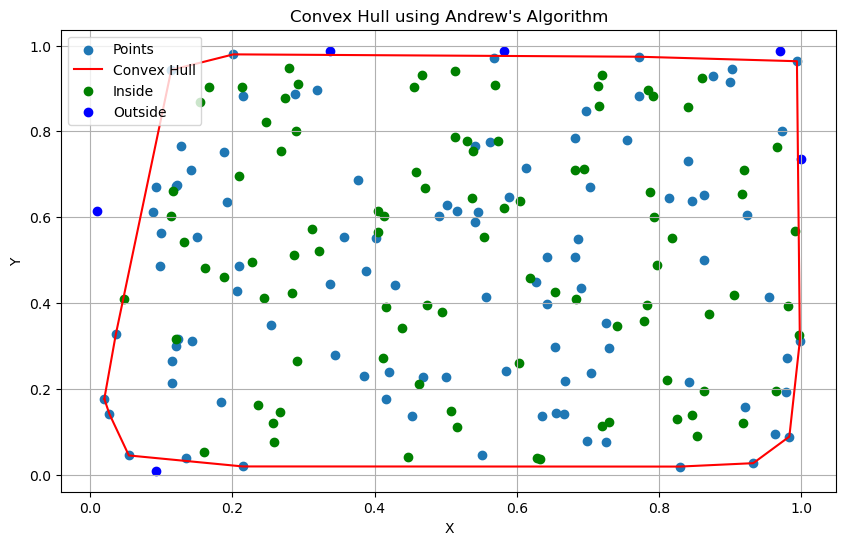

In [15]:
num_points_test = 100
x_test = np.random.rand(num_points_test)
y_test = np.random.rand(num_points_test)
num_points_test = np.column_stack((x_test, y_test)).tolist()
res = check_points(num_points_test, hull)

genearte_graph(x, y, hull_points, res)

In [16]:
clip_edge_start = convex_hull.Point(0.6, 0.6)
clip_edge_end = convex_hull.Point(0.1, 1.25)
clipped_polygon = convex_hull.sutherland_hodgman(hull, clip_edge_start, clip_edge_end)
clipped_polygon_points = [(p.x, p.y) for p in clipped_polygon]
clipped_polygon_points.append(clipped_polygon_points[0])
clipped_polygon_points = np.array(clipped_polygon_points)
print(clipped_polygon_points)


[[0.02019995 0.17649261]
 [0.02747101 0.14086489]
 [0.05470475 0.04465081]
 [0.21493084 0.01904616]
 [0.82884444 0.01872699]
 [0.93218302 0.02664969]
 [0.98295914 0.08858624]
 [0.98378394 0.10108087]
 [0.30893331 0.9783867 ]
 [0.2017018  0.9794224 ]
 [0.11431476 0.94307935]
 [0.03638242 0.32689593]
 [0.02019995 0.17649261]]


In [17]:
def plot_polygon(polygon, color):
    if len(polygon) > 0:
        polygon.append(polygon[0])  # замыкаем многоугольник
        xs, ys = zip(*[(p.x, p.y) for p in polygon])
        plt.plot(xs, ys, color=color)

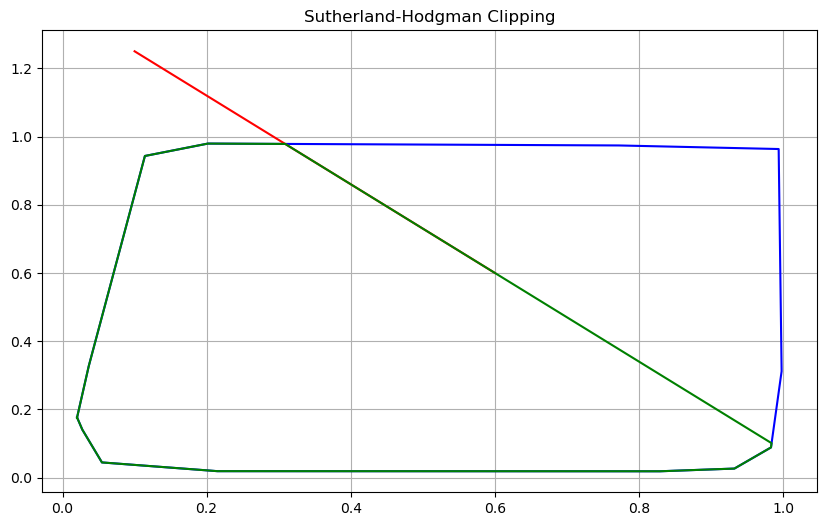

In [18]:
plt.figure(figsize=(10, 6))

plot_polygon(hull, 'blue')
plt.plot([clip_edge_start.x, clip_edge_end.x], [clip_edge_start.y, clip_edge_end.y], 'red')
plot_polygon(clipped_polygon, 'green')
plt.title('Sutherland-Hodgman Clipping')
plt.grid(True)
plt.show()

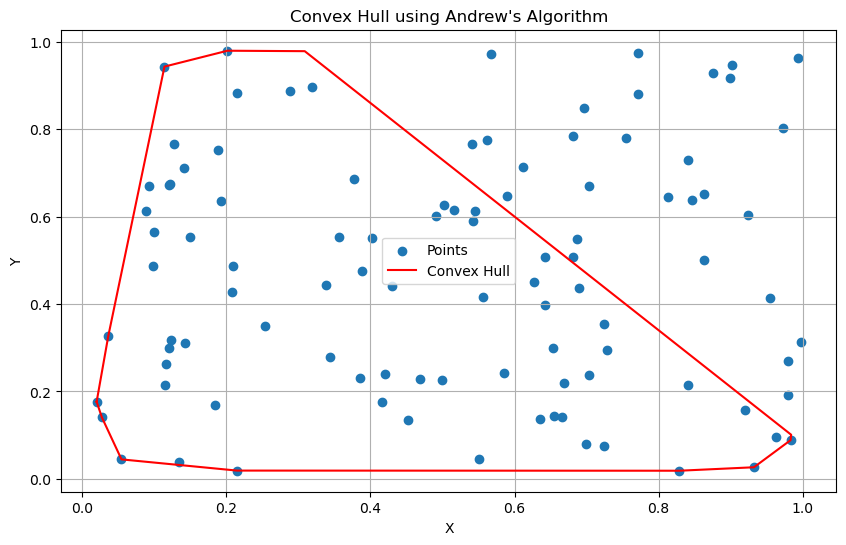

In [19]:
genearte_graph(x, y, clipped_polygon_points)

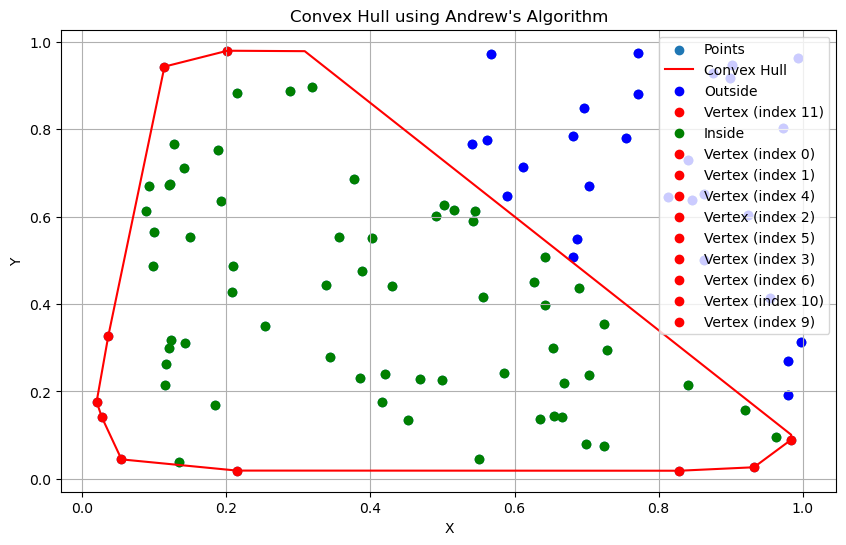

In [20]:
num_points_test = np.column_stack((x, y)).tolist()
res = check_points(num_points_test, clipped_polygon)

genearte_graph(x, y, clipped_polygon_points, res)

In [21]:
tri = Delaunay(points_np)

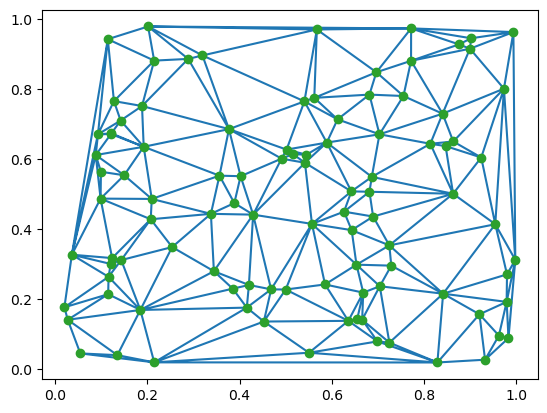

In [22]:

plt.triplot(points_np[:, 0], points_np[:, 1], tri.simplices)
plt.plot(points_np[:, 0], points_np[:, 1], 'o')
plt.show()

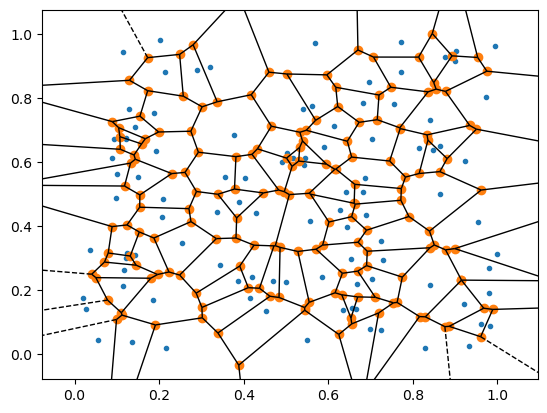

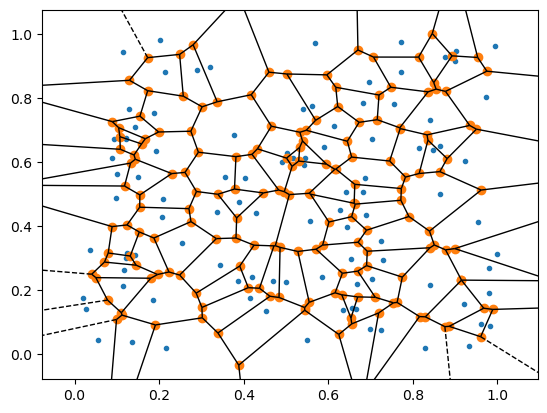

In [23]:
vor = Voronoi(points_np)
voronoi_plot_2d(vor)

In [24]:
def voronoi(points):
    tri = Delaunay(points)
    triangles = tri.points[tri.simplices]
    # Вершины треугольников
    A = triangles[:,0].T
    B = triangles[:,1].T
    C = triangles[:,2].T
    
    a = A - C
    b = B - C

    def dot2(u, v):
        return u[0] * v[0] + u[1] * v[1]
    
    # (u,w) * v - (u , v) * w
    def vec_dot(u, v, w):
        return dot2(u, w) * v - dot2(u, v) * w

    # |a|^2|b|^2-(a*b)^2
    def norm_vec_dot(u, v):
        return norm_vec_dot2(u) * norm_vec_dot2(v) - dot2(u, v) ** 2
    
    #норма вектора
    def norm_vec_dot2(u):
        return dot2(u, u)

    # Вычисление центров описанных окружностей
    # Каждой вершине триангуляции Делоне соответствует ячейка Вороного. Вершины ячеек Вороного - центры окружностей, описывающих треугольники триангуляции Делоне
    # Центр окружности, описывающей треугольник - равноудален от всех вершин треугольника => границы диаграммы Вороного будут перпендикулярны и пересекать середины рёбер триангуляции Делоне
    # https://en.wikipedia.org/wiki/Circumcircle
    circle_center = vec_dot(norm_vec_dot2(a) * b - norm_vec_dot2(b) * a, a, b) / (2 * norm_vec_dot(a, b)) + C

    vc = circle_center[:,tri.neighbors]
    vc[:,tri.neighbors == -1] = np.nan
    lines = []
    # Добавление ребер Вороного - соединение центров описанных окружностей каждого треугольников с центрами его соседей
    lines.extend(zip(circle_center.T, vc[:,:,0].T))
    lines.extend(zip(circle_center.T, vc[:,:,1].T))
    lines.extend(zip(circle_center.T, vc[:,:,2].T))
    return lines, circle_center


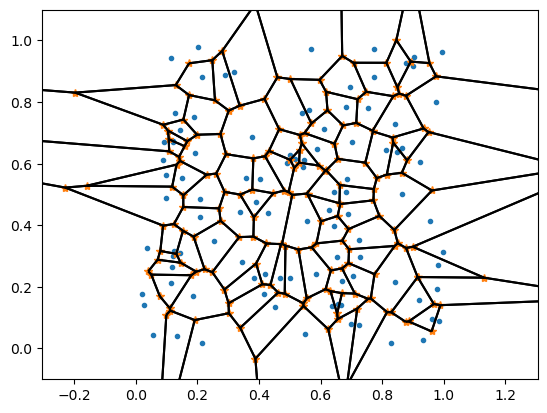

In [25]:
lines, circle_center = voronoi(points_np)

lines = LineCollection(lines, edgecolor='k')

plt.plot(points_np[:,0], points_np[:,1], '.')
plt.plot(circle_center[0], circle_center[1], '*')
plt.gca().add_collection(lines)
plt.axis('equal')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

In [26]:
def delaunay_calc(points):
    vor = Voronoi(points)
 
    delaunay_edges = set()
    #Каждая пара точек соседних точек Вороного - ребро триангуляции Делоне
    # ridge_points - пары точек, разделенные ребром Вороного
    for ridge_points in vor.ridge_points:
        p1, p2 = ridge_points
        delaunay_edges.add(tuple(sorted([p1, p2])))

    delaunay_triangles = []
    for point in range(len(points)):
        # Поиск соседей для Point. 
        neighbors = [edge[1] if edge[0] == point else edge[0] for edge in delaunay_edges if point in edge]
        if len(neighbors) >= 2:
            for i in range(len(neighbors)):
                for j in range(i + 1, len(neighbors)):
                    # Строим треугольник. Если ребро существует, то добавляем
                    if (neighbors[i], neighbors[j]) in delaunay_edges or (neighbors[j], neighbors[i]) in delaunay_edges:
                        delaunay_triangles.append([point, neighbors[i], neighbors[j]])
    return delaunay_triangles

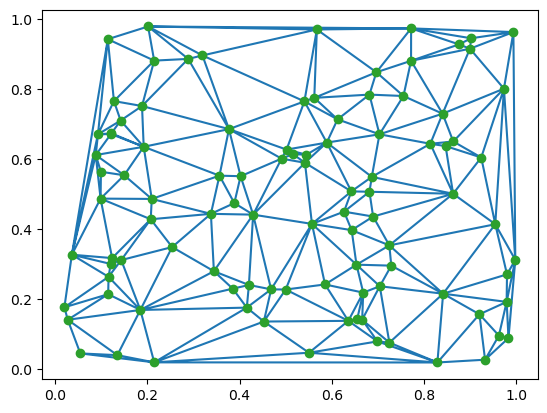

In [27]:
triangles = delaunay_calc(points_np)

plt.triplot(points_np[:, 0], points_np[:, 1], triangles)
plt.plot(points_np[:, 0], points_np[:, 1], 'o')
plt.show()